https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8

In [101]:
import pyforest
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler


# Read Data

In [102]:
data_path = r'..\..\data\titanic_train.csv'

In [103]:
df = pd.read_csv(data_path)
df.head(2)

<IPython.core.display.Javascript object>

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# Outlier removing using IQR

In [104]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [105]:
df_1 = df.copy()

In [106]:
#Find IQR
iqr = 1.5 * (np.nanpercentile(df_1.Age, 75)) - (np.nanpercentile(df_1.Age, 25))
print(iqr)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

36.875


## Before IQR 

In [107]:
df_1.shape

(891, 12)

C:\Users\595244\Anaconda3\envs\krish_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


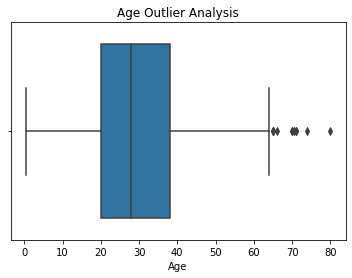

In [108]:
sns.boxplot(df_1.Age)
plt.title('Age Outlier Analysis')
plt.show()

C:\Users\595244\Anaconda3\envs\krish_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

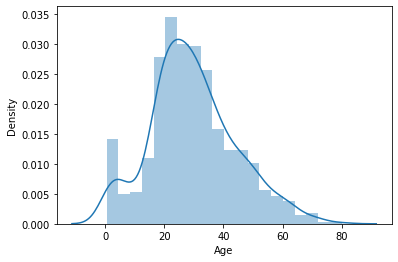

In [109]:
sns.distplot(df_1.Age)

## After IQR

In [110]:
df_1.drop(df_1[df_1['Age'] < (np.nanpercentile(df_1.Age, 25) - iqr)].index, inplace=True)
df_1.drop(df_1[df_1.Age > (iqr + np.nanpercentile(df_1.Age, 75))].index, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [111]:
df_1.shape

(890, 12)

C:\Users\595244\Anaconda3\envs\krish_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


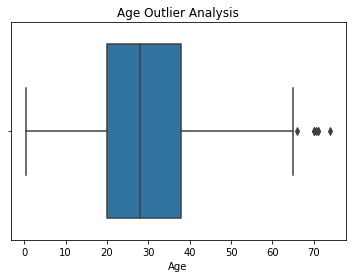

In [112]:
sns.boxplot(df_1.Age)
plt.title('Age Outlier Analysis')
plt.show()

C:\Users\595244\Anaconda3\envs\krish_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


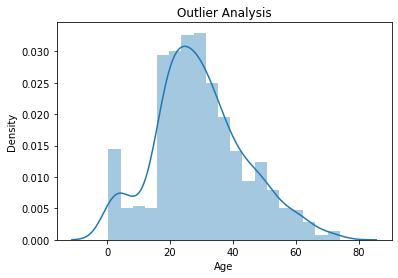

In [113]:
sns.distplot(df_1.Age)
plt.title('Outlier Analysis')
plt.show()

# Scaling

In [114]:
df_2 = df.copy()

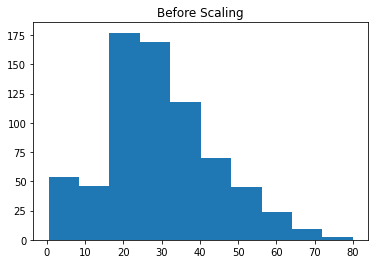

In [115]:
plt.hist(df_2.Age)
plt.title('Before Scaling')
plt.show()

In [116]:
scaler = StandardScaler()
df_2['Age_Scaled'] = scaler.fit_transform(df_2.Age.values.reshape(-1, 1))

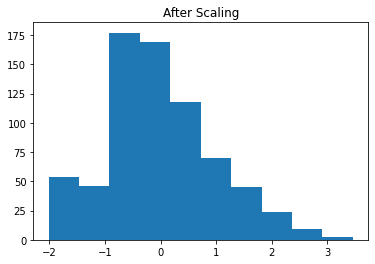

In [117]:
plt.hist(df_2.Age_Scaled)
plt.title('After Scaling')
plt.show()

C:\Users\595244\Anaconda3\envs\krish_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age_Scaled', ylabel='Density'>

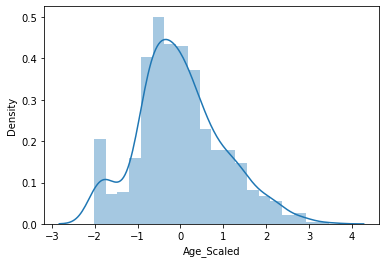

In [121]:
sns.distplot(df_2.Age_Scaled)

C:\Users\595244\Anaconda3\envs\krish_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age_Scaled'>

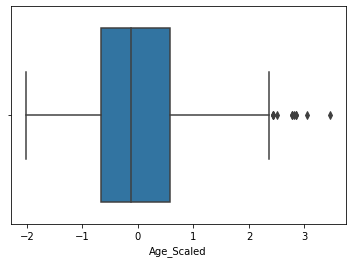

In [122]:
sns.boxplot(df_2.Age_Scaled)

## Log Transformation

In [123]:
df_log_Scaled = df.copy()

C:\Users\595244\Anaconda3\envs\krish_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


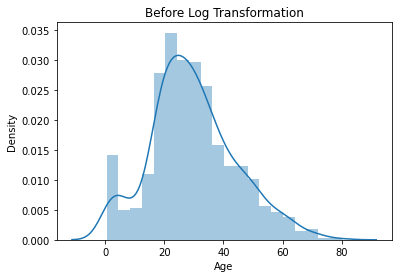

In [124]:
sns.distplot(df_log_Scaled.Age)
plt.title('Before Log Transformation')
plt.show()

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

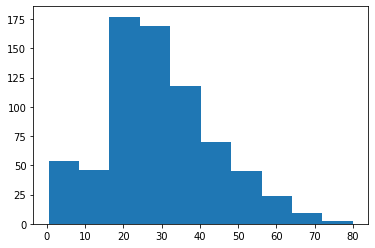

In [125]:
plt.hist(df_log_Scaled.Age)

C:\Users\595244\Anaconda3\envs\krish_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

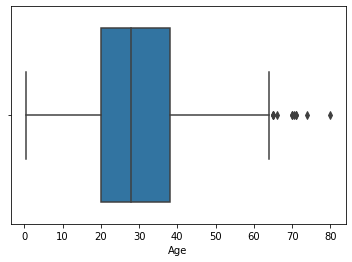

In [130]:
sns.boxplot(df_log_Scaled.Age)

<IPython.core.display.Javascript object>

C:\Users\595244\Anaconda3\envs\krish_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


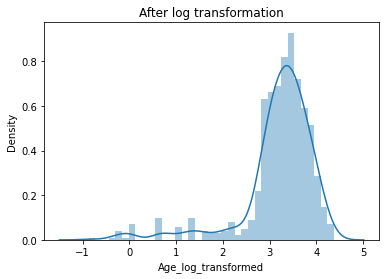

In [127]:
df_log_Scaled['Age_log_transformed'] = np.log(df_log_Scaled.Age)
sns.distplot(df_log_Scaled.Age_log_transformed)
plt.title('After log transformation')
plt.show()

(array([  2.,  12.,  10.,   6.,  14.,  18.,  38., 237., 288.,  89.]),
 array([-0.86750057, -0.34254785,  0.18240487,  0.70735759,  1.23231031,
         1.75726303,  2.28221575,  2.80716847,  3.33212119,  3.85707391,
         4.38202663]),
 <BarContainer object of 10 artists>)

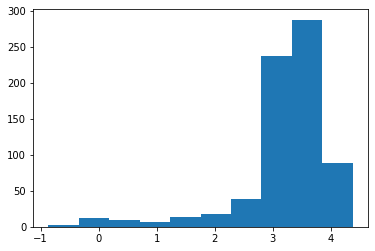

In [128]:
plt.hist(df_log_Scaled.Age_log_transformed)

C:\Users\595244\Anaconda3\envs\krish_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age_log_transformed'>

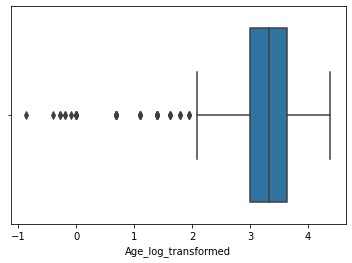

In [131]:
sns.boxplot(df_log_Scaled.Age_log_transformed)